# **Latar Belakang**
Komisi Taksi dan Limusin Kota New York (New York City Taxi and Limousine Commission - TLC) adalah badan pengatur yang bertanggung jawab atas lisensi dan pengawasan layanan taksi, limusin, dan kendaraan sewa lainnya di Kota New York. Didirikan pada tahun 1971, TLC memastikan keselamatan, keandalan, dan aksesibilitas layanan transportasi ini. Tugasnya meliputi pengaturan tarif, menetapkan standar kualifikasi pengemudi, melakukan inspeksi, dan menegakkan aturan untuk taksi kuning, taksi hijau Boro, layanan mobil hitam, aplikasi ride-hailing (seperti Uber dan Lyft), serta van komuter. Komisi ini juga mendukung inisiatif transportasi yang berkelanjutan dan adil, termasuk kendaraan yang ramah kursi roda dan kendaraan listrik.

*NYC TLC* ingin menganalisa tentang layanan taksi dengan menggunakan data yang berisi catatan perjalanan taksi di New York City, yang mencakup informasi seperti waktu penjemputan dan pengantaran, lokasi, jumlah penumpang, jarak perjalanan, dan rincian pembayaran. Dengan lebih dari 68.000 entri, data ini memberikan wawasan tentang tren transportasi, struktur tarif, dan pola penggunaan layanan taksi di kota yang sangat padat. Data ini sangat berguna untuk memahami dinamika mobilitas perkotaan, pola penetapan harga, dan mungkin untuk meningkatkan layanan seperti manajemen kemacetan atau opsi berbagi tumpangan.

# **Stakeholder**

3 stakeholder terpenting dalam data NYC TLC Trip Record adalah:
1. NYC Taxi and Limousine Commission (TLC)

  Peran:
  
  NYC TLC adalah badan pengatur resmi yang bertanggung jawab atas regulasi dan pengawasan layanan taksi, limusin, dan rideshare di kota New York.
  
  Kepentingan:
  
  Memastikan bahwa taksi dan layanan rideshare beroperasi sesuai dengan regulasi dan peraturan lalu lintas. Meningkatkan efisiensi operasional untuk mengurangi kemacetan di kota.
  
  Menentukan kebijakan harga, tarif kemacetan, serta biaya tambahan lainnya.
  Mengoptimalkan pendapatan dari layanan taksi melalui penerapan tarif yang adil dan sistem yang efisien.


2. Pengemudi Taksi

  Peran:
  
  Pengemudi taksi dan kendaraan for-hire adalah pelaku langsung yang menyediakan layanan transportasi kepada warga dan turis di kota New York.
  
  Kepentingan:
  
  Mendapatkan informasi mengenai pola perjalanan yang menguntungkan, waktu-waktu puncak, dan area yang memiliki potensi pendapatan lebih tinggi.

  Meningkatkan pendapatan pribadi melalui perjalanan yang efisien dan memaksimalkan tip dari penumpang.

  Menyesuaikan operasional mereka berdasarkan kebijakan TLC terkait tarif dinamis, biaya kemacetan, dan peraturan lainnya.


3. Penumpang (semua pengguna jasa layanan taksi)

  Peran:
  
  Penumpang adalah pengguna akhir layanan taksi yang bergantung pada sistem transportasi kota untuk mobilitas sehari-hari atau perjalanan wisata.
  
  Kepentingan:
  
  Menginginkan layanan transportasi yang andal, nyaman, dan terjangkau.
  Tertarik dengan waktu tempuh yang lebih cepat dan penurunan kemacetan di jalanan.
  Lebih menyukai berbagai opsi pembayaran yang fleksibel dan sistem tarif yang transparan.
  Menginginkan perjalanan yang aman, dengan akses yang mudah ke taksi, dan harga yang wajar.

  







#**Pernyataan Masalah**

Layanan taksi di Kota New York memegang peran penting dalam transportasi perkotaan, namun tantangan seperti kemacetan, optimasi tarif, dan efisiensi layanan masih terus ada. Berikut merupakan masalah - masalah yang bisa dijawab melalui analisa data yang akan kita lakukan pada bagian selanjutnya.

* Mengidentifikasi pola perjalanan, efektivitas kebijakan kemacetan, dan efektivitas biaya tambahan (surcharge).
* Memahami seberapa jauh informasi yang di dapat seperti jumlah pendapatan per perjalanan, jumlah penumpang per perjalanan, dan waktu dan lokasi berpengaruh dalam bisnis taksi.
* Mengetahui seberapa signifikannya korelasi antar biaya dalam total amout, serta memahami waktu tempuh perjalanan dan metode pembayaran dalam pengefisiensian biaya.

* Pemberian rekomendasi yang tepat untuk setiap stakeholder penting yang terlibat.








# **Dataset**
Untuk menjawab permasalahan di atas, kita akan menganalisa data layanan taksi yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [disini](https://https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N)

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from seaborn import boxplot, histplot


import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi mengenai hal- hal yang berkaitan dengan perjalan penumpang mulai dari vendor penyedia LPEP, waktu penggunaan layanan, tempat penjemputan,jenis tarif yang berlaku serta biaya - biaya yang dikenakan pada penumpang saat menggunakan jasa taksi di kota New York selama 1 bulan pada bulan Januari 2023.

Ada 20 kolom di dalam dataset NYC TLC Trip Record, yaitu:  

Berikut penjelasan mengenai nama dan pengertian setiap kolom yang ada dalam dataset taksi New York City yang Anda berikan:

1. **VendorID**: Kode yang menunjukkan penyedia LPEP (sistem pelaporan data elektronik taksi) yang menyediakan data pada catatan:

  1 = Creative Mobile Technologies, LLC.
  <BR>2 = VeriFone Inc.

2. **lpep_pickup_datetime**: Tanggal dan waktu ketika argo diaktifkan.

  Ini adalah informasi yang mencatat kapan argo (meteran taksi) mulai berjalan, biasanya menunjukkan awal perjalanan penumpang.

3. **lpep_dropoff_datetime**: Tanggal dan waktu ketika argo dimatikan.

  Ini adalah informasi yang mencatat kapan argo (meteran taksi) dihentikan, biasanya menunjukkan akhir perjalanan penumpang.

4. **store_and_fwd_flag**: Indikator apakah data perjalanan disimpan di memori kendaraan sebelum dikirim ke server karena tidak ada koneksi jaringan selama perjalanan.
   - 'Y' berarti data disimpan dan diteruskan.
   - 'N' berarti bukan data yang disimpan dan diteruskan.

5. **RatecodeID**: Kode tarif akhir yang berlaku di akhir perjalanan:

  1 = Tarif standar
<br>2 = JFK (Bandara John F. Kennedy)
<br>3 = Newark (Bandara Internasional Newark Liberty)
<br>4 = Nassau atau Westchester
<br>5 = Tarif yang dinegosiasikan
<br>6 = Perjalanan kelompok

6. **PULocationID**: Zona Taksi TLC tempat argo diaktifkan.

  Ini menunjukkan lokasi atau zona spesifik di New York City yang diatur oleh TLC (Taxi and Limousine Commission) di mana argo taksi mulai berjalan, biasanya ditentukan oleh zona geografis yang telah ditentukan oleh TLC.

7. **DOLocationID**: Zona Taksi TLC tempat argo dimatikan.

  Ini menunjukkan lokasi atau zona spesifik di New York City yang diatur oleh TLC (Taxi and Limousine Commission) di mana argo taksi berhenti berjalan, biasanya menandakan akhir dari perjalanan taksi tersebut.

8. **passenger_count**: Jumlah penumpang dalam kendaraan.

  Ini adalah nilai yang dimasukkan oleh pengemudi, menunjukkan berapa banyak penumpang yang ada dalam taksi selama perjalanan.

9. **trip_distance**: Jarak perjalanan yang ditempuh dalam mil.

  Ini adalah jarak total perjalanan yang dilaporkan oleh argo taksi (taximeter) selama perjalanan. Jarak ini diukur dalam satuan mil.

10. **fare_amount**: Tarif waktu dan jarak dihitung oleh argo. Biaya    tambahan dan surcharges lainnya.


11. **extra**: Biaya tambahan.

12. **mta_tax**: Pajak MTA sebesar 0,50 USD yang secara otomatis dikenakan berdasarkan tarif yang digunakan oleh argo.

  Pajak ini ditambahkan ke total biaya perjalanan ketika argo sedang aktif.

13. **tip_amount**: Kolom ini secara otomatis diisi untuk tip yang dibayarkan dengan kartu kredit.

  Tip yang diberikan dalam bentuk tunai tidak termasuk dalam kolom ini.

14. **tolls_amount**: Total jumlah semua biaya tol yang dibayarkan selama perjalanan.

15. **ehail_fee**: Biaya untuk memesan taksi melalui platform e-hailing. Kolom ini banyak memiliki nilai kosong, yang menandakan tidak ada biaya yang dikenakan untuk sebagian besar perjalanan.

16. **improvement_surcharge**: Biaya perningkatan sebesar 0,30 USD yang dikenakan pada perjalanan yang dihentikan pada saat argo diaktifkan (flag drop).

  Biaya perbaikan ini mulai diterapkan pada tahun 2015.

17. **total_amount**: Total jumlah yang dibebankan kepada penumpang. Tidak termasuk tip tunai.

18. **payment_type**: Kode numerik yang menunjukkan cara penumpang membayar untuk perjalanan:

  - **1** = Kartu kredit
  - **2** = Tunai
  - **3** = Tidak dikenakan Tagihan
  - **4** = Dispute
  - **5** = Unknown
  - **6** = Voided trip

19. **trip_type**: Kode yang menunjukkan apakah perjalanan merupakan pemanggilan di jalan (street hail) atau dispatch yang secara otomatis ditentukan berdasarkan tarif yang digunakan oleh argo, tetapi dapat diubah oleh pengemudi:

    1 = Pemanggilan di jalan (street-hail)
<br>2 = Dispatch



20. **congestion_surcharge**: Biaya tambahan yang dikenakan selama periode kemacetan tertentu di wilayah-wilayah dengan lalu lintas padat di NYC.

Kolom-kolom ini menggambarkan berbagai aspek perjalanan taksi di New York, dari rincian waktu hingga tarif, yang penting untuk dianalisis guna memahami pola penggunaan dan biaya.



Berikut 5 baris teratas dan terbawah dari dataset NYC TLC Trip Record.

In [149]:
df=pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi yang terdapat pada dataset NYC TLC Trip Record.

In [150]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [151]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


Sebelum memulai data cleaning, sebaiknya kita mengecek duplikasi terlebih dahulu. jika ada duplikasi dapat kita lakukan penghapusan duplikasi pada data cleaning. Namun jika tidak ada, bisa langsung kita melakukan proses cleaning data selanjutnya.


In [152]:
duplicate_rows = df[df.duplicated()]
# Menampilkan data duplikat
print(duplicate_rows)

# Jika ingin menghitung jumlah data duplikat
print("Jumlah data duplikat:", duplicate_rows.shape[0])


Empty DataFrame
Columns: [VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, ehail_fee, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge]
Index: []
Jumlah data duplikat: 0


Dari pengecekan data diatas ternyata tidak ditemukan data yang duplikat.

Pada proses data cleaning yang akan dilakukan, terdapat beberapa langkah untuk mempersiapkan dataset agar siap dianalisis. Berikut adalah penjelasan terperinci mengenai langkah-langkah yang dilakukan:








### Hapus Kolom

Menghapus Kolom dengan Banyak Nilai Kosong
Kolom yang dihapus:

ehail_fee: Kolom ini tidak memiliki data yang valid sama sekali (semua nilainya kosong). Karena tidak memberikan kontribusi informasi yang berguna untuk analisis, kolom ini dihapus dari dataset.

In [153]:
data_cleaned = df.drop(columns=['ehail_fee'])

### **Missing Value**

Mari kita check untuk seberapa banyak jumlah data yang kosong pada dataset kita.

In [154]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  improvement_surcharge  68211 non-null  float64
 15  to

In [155]:
# jumlah missing value di tiap kolom
data_cleaned.isna().sum()


,0
VendorID,0
lpep_pickup_datetime,0
lpep_dropoff_datetime,0
store_and_fwd_flag,4324
RatecodeID,4324
PULocationID,0
DOLocationID,0
passenger_count,4324
trip_distance,0
fare_amount,0


Menangani Nilai Kosong.

Beberapa kolom memiliki nilai kosong (missing values), sehingga dilakukan langkah-langkah berikut untuk menangani nilai yang hilang:

#### store_and_fwd_flag

Kolom ini diisi dengan nilai 'Unknown' untuk menandakan bahwa status penyimpanan dan pengiriman data tidak diketahui bagi beberapa perjalanan.

In [156]:
data_cleaned['store_and_fwd_flag'].fillna('Unknown', inplace=True)

#### **Kolom Nilai Default**

Kolom-kolom berikut diisi dengan nilai default dikarenakan isinya adalah data kategori yang di jadikan numerik. sehingga jika menggunakan median, dapat memungkinkan terjadinya bias pada saat menjelaskan hasil analisa yang telah dilakukan.

##### RatecodeID
Diisi dengan nilai 0 untuk menunjukkan tarif tidak diketahui atau tidak berlaku. mengapa diisi 0, karena ketika kita mengisi dengan median dan mengitepretasikan datanya akan memungkinkan adanya bias.

In [157]:
data_cleaned['RatecodeID'].fillna(0, inplace=True)

##### payment_type
Diisi dengan nilai 5 sebagai default yang menunjukkan metode pembayaran tidak diketahui. Alasan mengisi dengan angka 5 dikarenakan dalam keterangan dataset yang kita punya, pada kolom payment_type, nilai 5 artinya unknown yaitu data yang tidak diketahui.

In [158]:
data_cleaned['payment_type'].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [159]:
data_cleaned['payment_type'].fillna(5, inplace=True)
data_cleaned['payment_type'].unique()

array([1., 2., 3., 4., 5.])

##### trip_type
 Diisi dengan nilai 0 sebagai nilai default untuk perjalanan yang tidak diketahui jenisnya.

In [160]:
data_cleaned['trip_type'].fillna(0, inplace=True)

#### passenger_count
Pada kolom ini sebaiknya kita mengecek dahulu apakah passenger_count terdistribusi secara normal atau tidak dengan menggunakan histplot dan boxplot

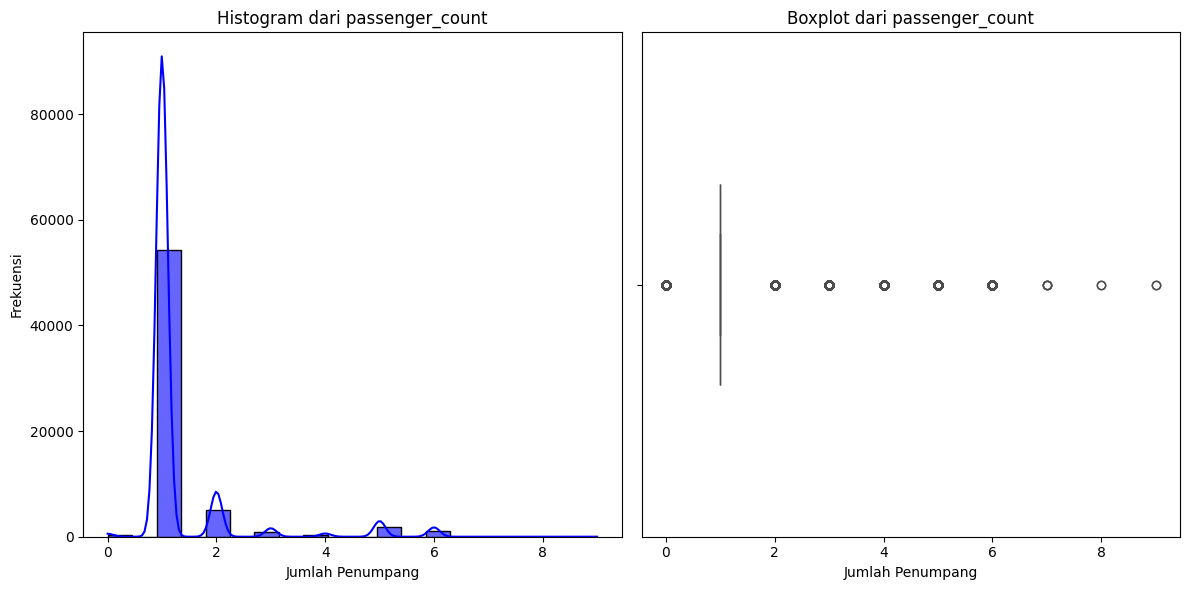

In [161]:
# Membuat figure dan axes dengan 1 baris dan 2 kolom
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Membuat histogram di subplot pertama
sns.histplot(data_cleaned['passenger_count'], ax=axs[0], bins=20, kde=True, color='blue', alpha=0.6)
axs[0].set_title('Histogram dari passenger_count')
axs[0].set_xlabel('Jumlah Penumpang')
axs[0].set_ylabel('Frekuensi')

# Membuat boxplot di subplot kedua
sns.boxplot(x=data_cleaned['passenger_count'], ax=axs[1], color='red', width=0.4)
axs[1].set_title('Boxplot dari passenger_count')
axs[1].set_xlabel('Jumlah Penumpang')

# Menampilkan plot
plt.tight_layout()  # Menyusun layout agar tidak overlap
plt.show()

Dari grafik histplot dan boxplot diatas, kita mengetahui bahwa data tidak terdistribusi normal. sehingga kita akan mengisi missing valuenya menggunakan mediannya.

In [162]:
data_cleaned['passenger_count'] = data_cleaned['passenger_count'].fillna(data_cleaned['passenger_count'].median())

#### congestion_surcharge
Pada kolom ini sebaiknya kita mengecek dahulu apakah congestion surcharge terdistribusi secara normal atau tidak dengan menggunakan Q-Q Plot

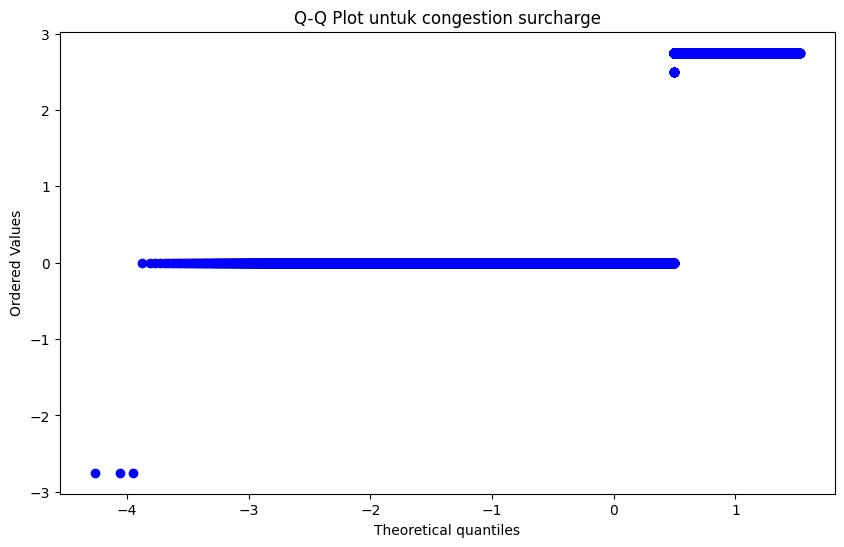

In [163]:
plt.figure(figsize=(10, 6))
stats.probplot(data_cleaned['congestion_surcharge'], dist="norm", plot=plt)
plt.title('Q-Q Plot untuk congestion surcharge')
plt.show()

dari hasil grafik Q-Q plot diatas dapat kita simpulkan bahwa data pada kolom congestion_fee tidak terdistribusi dengan normal sehingga, kita mengisi Missing Value nya menggunakan median pada kolom tersebut.

In [164]:
data_cleaned['congestion_surcharge'] = data_cleaned['congestion_surcharge'].fillna(data_cleaned['congestion_surcharge'].median())

# Verifikasi bahwa tidak ada lagi missing values di kolom 'congestion_surcharge'
print(data_cleaned['congestion_surcharge'].isnull().sum())

0


### **Konversi Tipe Data**

  Kolom yang berisi tanggal dan waktu perlu dikonversi ke tipe data datetime agar bisa digunakan untuk analisis lebih lanjut, seperti penghitungan durasi perjalanan:

* lpep_pickup_datetime dan lpep_dropoff_datetime dikonversi ke format
  datetime untuk memudahkan analisis berbasis waktu.

In [165]:

# Converting datetime columns to proper datetime format
data_cleaned['lpep_pickup_datetime'] = pd.to_datetime(data_cleaned['lpep_pickup_datetime'], errors='coerce')
data_cleaned['lpep_dropoff_datetime'] = pd.to_datetime(data_cleaned['lpep_dropoff_datetime'], errors='coerce')

# Verify cleaning process
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     68211 non-null  object        
 4   RatecodeID             68211 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        68211 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

### **Menambahkan Kolom**

Disini kita menambahkan kolom lama_perjalanan dan kolom lama_perjalanan_menit (dibulatkan) yang berguna untuk persiapan  analisa yang akan dilakukan selanjutnya.

In [166]:
# Now perform the subtraction
data_cleaned['lama_perjalanan'] = data_cleaned['lpep_dropoff_datetime'] - data_cleaned['lpep_pickup_datetime']

# Jika Anda ingin hasil dalam format tertentu, misalnya dalam menit
data_cleaned['lama_perjalanan_menit'] = (data_cleaned['lama_perjalanan'].dt.total_seconds() / 60).astype(int)

# Tampilkan DataFrame untuk melihat kolom baru
data_cleaned.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,lama_perjalanan,lama_perjalanan_menit
count,68211.000000,68211,68211,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211,68211.000000
mean,1.863028,2023-01-16 20:10:55.679524096,2023-01-16 20:29:01.515767040,1.046341,98.549735,138.429901,1.295847,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,1.603495,0.957001,0.680678,0 days 00:18:05.836243421,17.643972
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,0.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,0.000000,-2.750000,0 days 00:00:00,0.000000
25%,2.000000,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000,0 days 00:07:13,7.000000
50%,2.000000,2023-01-17 08:40:42,2023-01-17 08:56:38,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000,0 days 00:11:24,11.000000
75%,2.000000,2023-01-24 15:52:30,2023-01-24 16:06:56,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,2.000000,1.000000,0.000000,0 days 00:17:29,17.000000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000,0 days 23:59:53,1439.000000
std,0.343820,NaN,NaN,1.356283,61.244314,76.761311,0.950635,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,1.011212,0.286757,1.187047,0 days 01:14:55.537873522,74.924102


kolom lama_perjalanan_menit akan kita gunakan ketika melakukan analisa nantinya

### **Mengganti Nilai**

Di dalam dataset yang kita miliki menunjukan adanya kejanggalan pada kolom RatecodeID, mari kita lihat dan menyelesaikan untuk kejanggalan tersebut sebelum masuk pada analisa data.

In [167]:
data_cleaned['RatecodeID'].unique()

array([ 1.,  5.,  4.,  3.,  2., 99.,  0.])

Pada kolom RatecodeID kita menemukan adanya angka 1,2,3,4,5,99, dan Nan. Dimana seperti yang kita tau bahwa menurut penjelasan data yang kita punya, seharusnya isi angka pada kolom ini adalah 1,2,3,4,5 dan 6. Dari sini dapat kita ketahui bahwa dengan adanya nilai Nan pada kolom ini menunjukan angka 99 bukan merupakan kode untuk data yang tidak diketahui dan kemungkinan ketika memasukkan data orang yang bertugas melakukan kesalahan pada saat menginput data, sehingga untuk mempermudah mari kita ubah angka 99 menjadi angka 6.

In [168]:
data_cleaned['RatecodeID'].replace(99, 6, inplace=True)


Berikut merupkan hasil setelah kita mengganti nilai pda kolom RatecodeID.

In [169]:
data_cleaned['RatecodeID'].unique()

array([1., 5., 4., 3., 2., 6., 0.])

### **Data Ordering**

Yang dimaksud dengan data ordering adalah mengatur susunan kolom pada dataset yang telah dibersihkan dengan tujuan untuk memudahkan dalam membaca kolom ketika digunakan untuk analisa data.

In [170]:
new_order=['VendorID','lpep_pickup_datetime','lpep_dropoff_datetime','lama_perjalanan','lama_perjalanan_menit','store_and_fwd_flag','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','payment_type','trip_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','total_amount']
data_cleaned=data_cleaned[new_order]
data_cleaned.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,lama_perjalanan,lama_perjalanan_menit,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,...,payment_type,trip_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0 days 00:11:01,11,N,1.0,166,143,1.0,...,1.0,1.0,14.9,1.0,0.5,4.03,0.0,1.0,2.75,24.18
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0 days 00:06:46,6,N,1.0,24,43,1.0,...,1.0,1.0,10.7,1.0,0.5,2.64,0.0,1.0,0.00,15.84
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0 days 00:06:20,6,N,1.0,223,179,1.0,...,1.0,1.0,7.2,1.0,0.5,1.94,0.0,1.0,0.00,11.64
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0 days 00:05:49,5,N,1.0,41,238,1.0,...,1.0,1.0,6.5,0.5,1.5,1.70,0.0,1.0,0.00,10.20
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0 days 00:05:58,5,N,1.0,41,74,1.0,...,1.0,1.0,6.0,0.5,1.5,0.00,0.0,1.0,0.00,8.00


## **Data yang sudah bersih**


Hasil Data Cleaning
Setelah melakukan proses di atas, dataset menjadi:

Tidak memiliki kolom yang seluruhnya kosong (irrelevan).
Nilai kosong diisi dengan default yang logis agar dataset tetap lengkap dan bisa dianalisis dengan baik.
Data waktu (datetime) sudah terformat dengan benar, memungkinkan analisis berbasis waktu.
Baris yang memiliki waktu penjemputan atau pengantaran yang hilang sudah dihapus.
kolom juga sudah diatur peletakannya agar lebih mudah dibaca.

In [171]:
display(data_cleaned.describe(), data_cleaned.describe(include='object'), data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               68211 non-null  int64          
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns] 
 3   lama_perjalanan        68211 non-null  timedelta64[ns]
 4   lama_perjalanan_menit  68211 non-null  int64          
 5   store_and_fwd_flag     68211 non-null  object         
 6   RatecodeID             68211 non-null  float64        
 7   PULocationID           68211 non-null  int64          
 8   DOLocationID           68211 non-null  int64          
 9   passenger_count        68211 non-null  float64        
 10  trip_distance          68211 non-null  float64        
 11  payment_type           68211 non-null  float64        
 12  trip_type              68211 non-null  float64

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,lama_perjalanan,lama_perjalanan_menit,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,payment_type,trip_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount
count,68211.000000,68211,68211,68211,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000
mean,1.863028,2023-01-16 20:10:55.679524096,2023-01-16 20:29:01.515767040,0 days 00:18:05.836243421,17.643972,1.032707,98.549735,138.429901,1.295847,8.114852,1.603495,0.957001,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,0.680678,21.789377
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,0 days 00:00:00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-2.750000,-71.500000
25%,2.000000,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000,0 days 00:07:13,7.000000,1.000000,74.000000,74.000000,1.000000,1.110000,1.000000,1.000000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,12.900000
50%,2.000000,2023-01-17 08:40:42,2023-01-17 08:56:38,0 days 00:11:24,11.000000,1.000000,75.000000,138.000000,1.000000,1.850000,1.000000,1.000000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,0.000000,17.900000
75%,2.000000,2023-01-24 15:52:30,2023-01-24 16:06:56,0 days 00:17:29,17.000000,1.000000,129.000000,219.000000,1.000000,3.210000,2.000000,1.000000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,0.000000,26.150000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,0 days 23:59:53,1439.000000,6.000000,265.000000,265.000000,9.000000,120098.840000,5.000000,2.000000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,2.750000,491.000000
std,0.343820,NaN,NaN,0 days 01:14:55.537873522,74.924102,0.660486,61.244314,76.761311,0.950635,585.105955,1.011212,0.286757,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,1.187047,15.457115


,store_and_fwd_flag
count,68211
unique,3
top,N
freq,63579


None

In [172]:
data_cleaned.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,lama_perjalanan,lama_perjalanan_menit,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,...,payment_type,trip_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0 days 00:11:01,11,N,1.0,166,143,1.0,...,1.0,1.0,14.9,1.0,0.5,4.03,0.0,1.0,2.75,24.18
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0 days 00:06:46,6,N,1.0,24,43,1.0,...,1.0,1.0,10.7,1.0,0.5,2.64,0.0,1.0,0.00,15.84
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0 days 00:06:20,6,N,1.0,223,179,1.0,...,1.0,1.0,7.2,1.0,0.5,1.94,0.0,1.0,0.00,11.64
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0 days 00:05:49,5,N,1.0,41,238,1.0,...,1.0,1.0,6.5,0.5,1.5,1.70,0.0,1.0,0.00,10.20
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0 days 00:05:58,5,N,1.0,41,74,1.0,...,1.0,1.0,6.0,0.5,1.5,0.00,0.0,1.0,0.00,8.00


# **Data Analysis**


Setelah kita melakukan cleaning data, mari kita masuk pada tahap analisa data, namun sebelum menganalisa lebih jauh, kita harus melakukan pengecekan terlebih dahulu apakah data yang kita miliki tersebut terdistribusi dengan normal atau tidak.

##**Cek Normalitas Persebaran Data**

menguji normalitas total amount dengan menggunakan shaphiro test serta menampilkan dengan histplot dan Q-Q plot.

In [173]:
shapiro_test = stats.shapiro(data_cleaned['total_amount'])
print('Statistic:', shapiro_test.statistic)
print('p-value:', shapiro_test.pvalue)

# Interpretasi
if shapiro_test.pvalue > 0.05:
    print("Data terdistribusi normal (gagal menolak H0).")
else:
    print("Data tidak terdistribusi normal (menolak H0).")

Statistic: 0.6990310367139725
p-value: 8.533402556303879e-135
Data tidak terdistribusi normal (menolak H0).


In [174]:
# Membuat histogram untuk distribusi 'total_amount'
fig_total_amount = px.histogram(data_cleaned,
                                x='total_amount',
                                nbins=50,  # Sesuaikan jumlah bins sesuai preferensi
                                title='Distribusi Total Biaya Perjalanan',
                                labels={'total_amount': 'Total Biaya ($)'},
                                color_discrete_sequence=['#EF553B'])

# Menampilkan histogram
fig_total_amount.show()

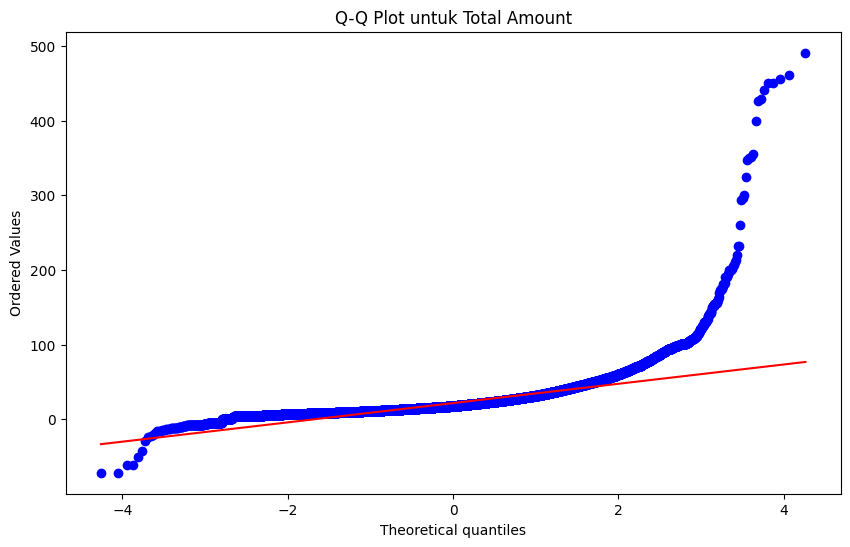

In [175]:

# Membuat Q-Q plot menggunakan Matplotlib dan SciPy
plt.figure(figsize=(10, 6))
stats.probplot(data_cleaned['total_amount'], dist="norm", plot=plt)
plt.title('Q-Q Plot untuk Total Amount')
plt.show()

Dengan kita melihat hasil pengujian dan hasil dari grafik histogram dan Q-Q plot untuk kolom total_amount dapat disimpulkan bahwa data yang kita miliki tidak
terdistribusi dengan normal yang mana ini akan berpengaruh untuk analisa korelasi yang akan kita gunakan selanjutnya.

##Mengidentifikasi pola perjalanan, efektivitas kebijakan kemacetan, *peak hour*, dan efektivitas biaya tambahan (surcharge).

### Total Jumlah Perjalanan dan Pendapatan

Menghitung total pendapatan, termasuk biaya dasar, biaya tambahan, dan tip, untuk mengidentifikasi tren pendapatan.

In [176]:

# Menambahkan kolom hari dalam seminggu
data_cleaned['day_of_week'] = data_cleaned['lpep_pickup_datetime'].dt.day_name()
# Mengatur urutan hari secara manual
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_cleaned['day_of_week'] = pd.Categorical(data_cleaned['day_of_week'], categories=days_order, ordered=True)
# Menghitung rata-rata pendapatan per perjalanan dan jumlah total perjalanan per hari
total_revenue = data_cleaned.groupby('day_of_week').agg({
    'total_amount': ['mean', 'sum'],  # Rata-rata dan total pendapatan total (termasuk semua biaya)
    'lpep_pickup_datetime': 'count'  # Total jumlah perjalanan
}).reset_index()

# Flatten multi-index columns
total_revenue.columns = ['day_of_week', 'avg_total_amount_per_trip', 'total_revenue', 'total_trips']

# Plot rata-rata total pendapatan dan jumlah perjalanan per hari
fig_total_revenue = px.bar(total_revenue, x='day_of_week', y=['avg_total_amount_per_trip', 'total_trips'],
                           labels={'value': 'Rata-rata Pendapatan & Jumlah Perjalanan', 'day_of_week': 'Hari dalam Minggu'},
                           title='Rata-rata Total Pendapatan dan Jumlah Perjalanan Berdasarkan Hari dalam Minggu')
fig_total_revenue.update_layout(barmode='group', xaxis_title='Hari', yaxis_title='Total Amount / Jumlah Perjalanan')
fig_total_revenue.show()

In [177]:
total_revenue

,day_of_week,avg_total_amount_per_trip,total_revenue,total_trips
0,Monday,21.623083,216079.47,9993
1,Tuesday,21.803582,245573.74,11263
2,Wednesday,21.629457,213828.81,9886
3,Thursday,22.135831,225984.70,10209
4,Friday,21.903340,218880.08,9993
5,Saturday,21.641462,184385.26,8520
6,Sunday,21.749510,181543.16,8347


Penjelasan grafik batang dan tabel:

Dari grafik dan tabel diatas dapat kita lihat bahwa jumlah trip dan jumlah pendapatan tertinggi ada pada hari selasa sebesar 112263 trip dan 245.573,74 USD. Sedangkan rata- rata pendapatan tertinggi untuk setiap tripnya ada pada hari kamis sebesar 22.136 USD.




### Distribusi Biaya Kemacetan (Congestion Surcharge)

Melihat bagaimana biaya kemacetan (congestion surcharge) diterapkan dan menghitung total pendapatan dari biaya ini, serta persentase perjalanan yang dikenai biaya kemacetan.

In [178]:
# Menghitung total pendapatan dari biaya kemacetan dan persentase perjalanan yang dikenai biaya kemacetan
congestion_data = data_cleaned.groupby('day_of_week').agg({
    'congestion_surcharge': ['sum', lambda x: (x > 0).mean() * 100]  # Total pendapatan dan persentase perjalanan dengan biaya kemacetan
}).reset_index()

# Flatten multi-index columns
congestion_data.columns = ['day_of_week', 'total_congestion_surcharge', 'percent_trips_with_surcharge']

# Plot total pendapatan dari biaya kemacetan dan persentase perjalanan yang dikenai biaya
fig_congestion = px.bar(congestion_data, x='day_of_week', y=['total_congestion_surcharge', 'percent_trips_with_surcharge'],
                        labels={'value': 'Biaya Kemacetan & Persentase Perjalanan', 'day_of_week': 'Hari dalam Minggu'},
                        title='Distribusi Biaya Kemacetan dan Persentase Perjalanan dengan Biaya Kemacetan')
fig_congestion.update_layout(barmode='group', xaxis_title='Hari', yaxis_title='Total Congestion Surcharge / % Perjalanan')
fig_congestion.show()

In [179]:
congestion_data

,day_of_week,total_congestion_surcharge,percent_trips_with_surcharge
0,Monday,7132.50,25.958171
1,Tuesday,8072.75,26.076534
2,Wednesday,7204.75,26.502124
3,Thursday,6866.25,24.478401
4,Friday,6376.75,23.206244
5,Saturday,5312.75,22.676056
6,Sunday,5464.00,23.804960


Penjelasan grafik batang dan tabel:

Dari grafik dan tabel diatas dapat kita lihat total biaya kemacetan tertinggi ada pada hari selasa sebesar 8.072,75 USD , dan hari rabu menunjukkan persentase perjalanan yang dikenai biaya kemacetan paling signifikan yaitu sekitar 26.5%.

###Waktu Tempuh dan Jarak Perjalanan

Menganalisa waktu tempuh rata-rata dan jarak rata-rata per perjalanan, serta bagaimana hal ini bervariasi antara hari kerja dan akhir pekan.

In [180]:
# Membuat kolom untuk menentukan apakah perjalanan dilakukan pada hari kerja atau akhir pekan
data_cleaned['is_weekend'] = data_cleaned['lpep_pickup_datetime'].dt.dayofweek >= 5

# Menghitung rata-rata waktu tempuh dan jarak per perjalanan berdasarkan hari kerja dan akhir pekan
time_distance_data = data_cleaned.groupby('is_weekend').agg({
    'trip_distance': 'mean',  # Rata-rata jarak perjalanan
    'total_amount': 'mean'  # Rata-rata total biaya per perjalanan
}).reset_index()

# Mengganti nilai is_weekend dengan label
time_distance_data['is_weekend'] = time_distance_data['is_weekend'].replace({True: 'Akhir Pekan', False: 'Hari Kerja'})

# Plot rata-rata jarak perjalanan dan biaya total per perjalanan
fig_time_distance = px.bar(time_distance_data, x='is_weekend', y=['trip_distance', 'total_amount'],
                           labels={'value': 'Rata-rata Jarak dan Biaya', 'is_weekend': 'Hari'},
                           title='Rata-rata Jarak Perjalanan dan Total Amount Berdasarkan Hari')
fig_time_distance.update_layout(barmode='group', xaxis_title='Hari', yaxis_title='Jarak Perjalanan / Total Amount (USD)')
fig_time_distance.show()

In [181]:
time_distance_data

,is_weekend,trip_distance,total_amount
0,Hari Kerja,7.835398,21.820404
1,Akhir Pekan,8.965525,21.694932


Penjelasan grafik batang dan tabel:

Grafik ini akan membantu membandingkan rata-rata jarak perjalanan dan total biaya per perjalanan antara hari kerja dan akhir pekan. yang mana rata-rata jarak perjalanan pada saat weekend lebih banyak dari pada saat hari kerja, namun rata-rata total biaya untuk tiap perjalanan lebih tinggi pada saat hari kerja.

## Memahami seberapa jauh informasi yang di dapat seperti jumlah pendapatan per perjalanan, jumlah penumpang per perjalanan, dan waktu dan lokasi berpengaruh dalam bisnis taksi.

###Pendapatan per Perjalanan (Total Amount dan Tip Amount)

Data ini menunjukkan wilayah atau waktu yang menawarkan penghasilan yang lebih tinggi.

In [182]:
# Menghitung rata-rata pendapatan per perjalanan dan rata-rata tip
driver_income = data_cleaned.groupby('day_of_week').agg({
    'total_amount': 'mean',  # Rata-rata total amount per perjalanan
    'tip_amount': 'mean'     # Rata-rata tip per perjalanan
}).reset_index()

# Plot rata-rata total amount dan tip per hari
fig_driver_income = px.bar(driver_income, x='day_of_week', y=['total_amount', 'tip_amount'],
                           labels={'value': 'Rata-rata Total Amount dan Tip', 'day_of_week': 'Hari dalam Minggu'},
                           title='Rata-rata Total Amount dan Tip per Perjalanan Berdasarkan Hari dalam Minggu')
fig_driver_income.update_layout(barmode='group', xaxis_title='Hari', yaxis_title='Total Amount / Tip (USD)')
fig_driver_income.show()

In [183]:
driver_income

,day_of_week,total_amount,tip_amount
0,Monday,21.623083,2.092342
1,Tuesday,21.803582,2.087643
2,Wednesday,21.629457,2.118696
3,Thursday,22.135831,2.159960
4,Friday,21.903340,2.106127
5,Saturday,21.641462,2.188340
6,Sunday,21.749510,2.251659


Penjelasan grafik batang dan tabel:

Grafik ini menunjukkan rata-rata biaya untuk setiap perjalanan paling tinggi ada pada hari kamis sebesar 22.136 USD. Serta dapat kita lihat bahwa rata-rata tip tertinggi yang diberikan biasanya pada hari minggu.

### Jumlah Penumpang per Perjalanan

Mengidentifikasi tren jumlah penumpang dalam satu perjalanan, yang dapat digunakan untuk merencanakan perjalanan lebih efisien.

In [184]:
# Menghitung distribusi jumlah penumpang per perjalanan
passenger_distribution = data_cleaned['passenger_count'].value_counts().reset_index()
passenger_distribution.columns = ['passenger_count', 'trip_count']

# Plot distribusi jumlah penumpang per perjalanan
fig_passenger_dist = px.bar(passenger_distribution, x='passenger_count', y='trip_count',
                            labels={'passenger_count': 'Jumlah Penumpang', 'trip_count': 'Jumlah Perjalanan'},
                            title='Distribusi Jumlah Penumpang per Perjalanan')
fig_passenger_dist.update_layout(xaxis_title='Jumlah Penumpang', yaxis_title='Jumlah Perjalanan')
fig_passenger_dist.show()

In [185]:
data_cleaned['passenger_count'].value_counts()


,count
passenger_count,
1.0,58623
2.0,5096
5.0,1772
6.0,1054
3.0,958
4.0,364
0.0,336
7.0,4
9.0,2


Penjelasan grafik batang dan tabel:

Grafik ini menunjukkan jumlah penumpang yang biasanya bepergian dalam satu perjalanan cenderung lebih sering sendirian. didukung dengan data yaitu sebanyak 58.623 jumlah perjalanan berisi seorang penumpang saja.


###Waktu dan Lokasi Perjalanan yang Menguntungkan
Data dapat mengungkapkan waktu dan lokasi yang menghasilkan pendapatan tertinggi.

Analisa berdasarkan waktu yang paling mengguntungkan

In [186]:
# Ekstrak jam dari waktu pickup
data_cleaned['pickup_hour'] = data_cleaned['lpep_pickup_datetime'].dt.hour

# Menghitung jumlah perjalanan per jam
trip_count_by_hour = data_cleaned.groupby('pickup_hour').size().reset_index(name='trip_count')

# Menghitung rata-rata total amount per jam
avg_amount_by_hour = data_cleaned.groupby('pickup_hour')['total_amount'].mean().reset_index()

# Menggabungkan data jumlah perjalanan dan rata-rata total amount
analysis_by_hour = pd.merge(trip_count_by_hour, avg_amount_by_hour, on='pickup_hour')

# Membuat scatter plot untuk jumlah perjalanan dan rata-rata total amount berdasarkan jam
fig_scatter = px.scatter(
    analysis_by_hour,
    x='pickup_hour',
    y='trip_count',
    size='total_amount',
    color='total_amount',
    labels={'pickup_hour': 'Jam Perjalanan', 'trip_count': 'Jumlah Perjalanan', 'total_amount': 'Rata-rata Total Amount (USD)'},
    title='Analisis Jumlah Perjalanan dan Total Amount Berdasarkan Jam Perjalanan'
)

# Menyesuaikan tampilan scatter plot
fig_scatter.update_layout(width=1000, height=600)

# Menampilkan scatter plot
fig_scatter.show()

# Membuat bar plot untuk memvisualisasikan jumlah perjalanan dan rata-rata total amount berdasarkan jam
fig_bar = px.bar(
    analysis_by_hour,
    x='pickup_hour',
    y='trip_count',
    text='total_amount',
    labels={'pickup_hour': 'Jam Perjalanan', 'trip_count': 'Jumlah Perjalanan', 'total_amount': 'Rata-rata Total Amount (USD)'},
    title='Jumlah Perjalanan dan Rata-rata Total Amount Berdasarkan Jam Perjalanan'
)

# Menambahkan anotasi untuk rata-rata total amount di atas batang
fig_bar.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Menampilkan bar plot
fig_bar.show()

In [187]:
analysis_by_hour

,pickup_hour,trip_count,total_amount
0,0,1129,21.201727
1,1,891,23.020774
2,2,659,24.333096
3,3,598,25.684649
4,4,451,26.600443
5,5,431,30.059420
6,6,998,22.731132
7,7,2646,21.110378
8,8,3219,21.978993
9,9,3520,21.556719


Penjelasan grafik:

Scatter Plot: Plot ini menggambarkan hubungan antara jumlah perjalanan per jam dan rata-rata total amount. Ukuran gelembung menggambarkan rata-rata total amount untuk setiap jam.<br>
Bar Plot: Bar plot menunjukkan jumlah perjalanan setiap jam, dengan anotasi di atas batang yang menunjukkan rata-rata total amount untuk jam tersebut.

Dari kedua plot ini, kita bisa melihat terjadinya peningkatan penggunaan jasa taksi mulai dari jam 05.00 sampai jam 18.00. dan mulai berkurang antara jam 18.00 sampai jam 05.00. Sedangkan rata - rata total biaya per perjalanan yang terlihat cukup tinggi pada saat pagi sekitar jam 01.00-06.00 dan pada saat sore antara jam 16.00-17.00

Analisa berdasarkan lokasi yang paling menguntungkan

In [188]:
# Menghitung rata-rata total amount per lokasi pickup
avg_amount_per_location = data_cleaned.groupby('PULocationID')['total_amount'].mean().reset_index(name='avg_total_amount')

# Menghitung jumlah perjalanan (trip count) per lokasi pickup
trip_count_per_location = data_cleaned.groupby('PULocationID').size().reset_index(name='trip_count')

# Menggabungkan kedua metrik (rata-rata total amount dan jumlah perjalanan)
location_analysis = pd.merge(avg_amount_per_location, trip_count_per_location, on='PULocationID')

# Mengambil 10 lokasi pickup dengan trip count tertinggi
top_10_locations = location_analysis.nlargest(10, 'trip_count')

# Membuat bubble plot (scatter plot) untuk 10 lokasi pickup teratas
fig_bubble = px.scatter(top_10_locations,
                        x='PULocationID',
                        y='avg_total_amount',
                        size='trip_count',
                        color='trip_count',
                        labels={'PULocationID': 'ID Lokasi Pickup', 'avg_total_amount': 'Rata-rata Total Amount (USD)', 'trip_count': 'Jumlah Perjalanan'},
                        title='Analisis Lokasi: Rata-rata Pendapatan vs Jumlah Perjalanan (Top 10 Lokasi Pickup)',
                        size_max=60)

# Menyesuaikan ukuran dan tampilan grafik
fig_bubble.update_layout(xaxis_title='ID Lokasi Pickup',
                         yaxis_title='Rata-rata Total Amount (USD)',
                         width=900, height=600)

# Menampilkan bubble plot
fig_bubble.show()

In [189]:
print(top_10_locations)

     PULocationID  avg_total_amount  trip_count
63             74         19.342947       13257
64             75         20.105635        9109
31             41         18.164101        4058
136           166         21.571124        3879
83             95         19.125301        3839
71             82         21.354725        2927
33             43         22.167657        2868
84             97         21.613472        2195
2               7         20.354448        1965
205           244         31.310006        1804


Penjelasan scatter plot dan tabel:

Scater plot ini menampilkan 10 lokasi pickup yang menghasilkan rata-rata pendapatan tertinggi serta jumlah perjalanan yang dilakukan di setiap lokasi. ID lokasi penjemputan yang menghasilkan rata-rata total biaya untuk setiap perjalan tertinggi adalah PULocationID nomor 244 sebesar 31.310 USD. sedangkan total penjemputan terbanyak pada PULocationID nomor 74 sebanyak 13257 perjalanan yang diawali dari lokasi tersebut.



##**Mengetahui seberapa signifikannya korelasi antar biaya dalam total amout, serta memahami waktu tempuh perjalanan dan metode pembayaran dalam pengefisiensian biaya.**

### Menghitung Korelasi Antara Biaya-Biaya dan Total Amount

Korelasi akan membantu kita melihat biaya mana yang memiliki pengaruh paling besar terhadap total biaya perjalanan. Kita bisa mengukur korelasi antara total_amount dengan variabel-variabel biaya seperti fare_amount, tip_amount, congestion_surcharge, tolls_amount, improvement_surcharge dan extra.

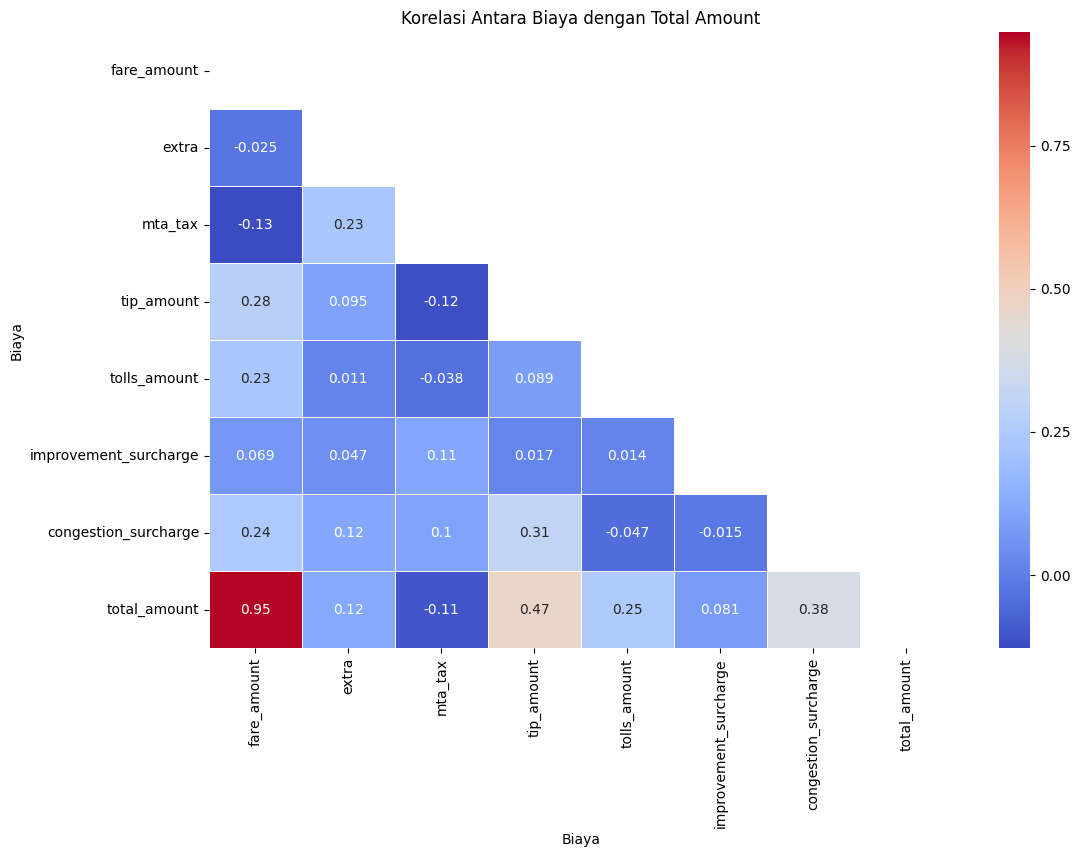

In [190]:

# Memilih kolom biaya terkait
biaya_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge','congestion_surcharge', 'total_amount']

# Menghitung matriks korelasi
correlation_matrix = data_cleaned[biaya_columns].corr('spearman')

# Membuat mask untuk nilai korelasi
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', linewidths=0.5, cbar_kws={"ticks": [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]})
plt.title('Korelasi Antara Biaya dengan Total Amount')
plt.xlabel('Biaya')
plt.ylabel('Biaya')
plt.show()

Kita menggunakan korelasi spearman dikarenakan data yang kita miliki tidak terdistribusi dengan normal.

Nilai korelasi berkisar dari -1 hingga 1.<br>
1 berarti hubungan positif sempurna (jika satu variabel naik, variabel lain juga naik).<br>
-1 berarti hubungan negatif sempurna (jika satu variabel naik, yang lain turun).
0 berarti tidak ada hubungan linear antara kedua variabel.

Dari heatmap diatas dapat kita simpulkan bahwa fare_amount atau tarif yang di hitung oleh argo berkorelasi sangat signifikan terhadap total biaya. sedangkan untuk tips_amount dan congestion_surcharge berkorelasi sedang, dan tolls_amount berkorelasi rendah terhadap total_amount

###Waktu Tempuh dan Waktu Tunggu: Analisis Waktu Perjalanan Rata-rata

Analisis ini untuk menghitung waktu perjalanan rata-rata dalam menit. Penumpang bisa menggunakan informasi ini untuk merencanakan perjalanan lebih efisien.

In [191]:
# Hitung rata-rata waktu perjalanan
avg_trip_duration = data_cleaned['lama_perjalanan_menit'].mean()

# Distribusi waktu tempuh per perjalanan
fig_duration = px.histogram(data_cleaned,
                             x='lama_perjalanan_menit',
                             nbins=50,
                             title='Distribusi Waktu Tempuh Perjalanan',
                             labels={'lama_perjalanan_menit': 'Waktu Tempuh (menit)'})

# Tambahkan garis rata-rata pada histogram
fig_duration.add_vline(x=avg_trip_duration, line_color='red', line_width=2, line_dash='dash',
                       annotation_text='Rata-rata', annotation_position='top right')

# Tampilkan plot
fig_duration.show()

# Rata-rata waktu tempuh
print(f'Rata-rata waktu tempuh: {avg_trip_duration:.2f} menit')

Rata-rata waktu tempuh: 17.64 menit


In [192]:
print(data_cleaned['lama_perjalanan_menit'].describe())

count    68211.000000
mean        17.643972
std         74.924102
min          0.000000
25%          7.000000
50%         11.000000
75%         17.000000
max       1439.000000
Name: lama_perjalanan_menit, dtype: float64


Dari histogram umumnya durasi waktu tempuh dalam sekali perjalanan adalah 0-49 menit serta rata-rata durasinya 17,64 menit

### Metode Pembayaran: Proporsi Penggunaan Metode Pembayaran

Analisis ini melihat distribusi metode pembayaran yang digunakan penumpang untuk memahami metode mana yang paling sering digunakan.

In [193]:

# Menghitung distribusi metode pembayaran
payment_distribution = data_cleaned['payment_type'].value_counts().reset_index()

# Ubah nama kolom agar lebih jelas
payment_distribution.columns = ['payment_code', 'count']

# Ganti angka kode menjadi label metode pembayaran
payment_labels = {
    1: 'Kartu Kredit',
    2: 'Tunai',
    3: 'Tanpa Biaya',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Terapkan penggantian label
payment_distribution['payment_code'] = payment_distribution['payment_code'].replace(payment_labels)

# Visualisasikan distribusi metode pembayaran
fig_payment = px.pie(payment_distribution,
                     names='payment_code',
                     values='count',
                     title='Distribusi Penggunaan Metode Pembayaran')

# Tambahkan persentase dan sesuaikan warna
fig_payment.update_traces(textinfo='percent+label',
                          marker=dict(colors=['skyblue', 'leafgreen', 'orange', 'red', 'purple', 'yellow']))

# Tampilkan plot
fig_payment.show()

Grafik pie chart menunjukkan metode pembayaran yang paling mendominasi adalah metode pembayaran dengan kartu kredit sebesar 59,6%. serta pembayaran dengan tunai berada diposisi kedua dengan persentase sebesar 33.2%.

#**Kesimpulan**

1. Pola Perjalanan dan Pendapatan Berdasarkan Hari: Dari analisis, terlihat bahwa hari Selasa mencatat jumlah perjalanan dan pendapatan tertinggi, dengan total 112.263 trip dan pendapatan sebesar 245.573,74 USD. Namun, rata-rata pendapatan per trip tertinggi dicapai pada hari Kamis dengan 22,136 USD per perjalanan. Kemacetan berpengaruh besar pada biaya di hari kerja, khususnya pada hari Selasa yang mencatat biaya kemacetan tertinggi, sedangkan persentase perjalanan yang dikenai biaya kemacetan paling signifikan terjadi pada hari Rabu (26,5%). Rata-rata jarak perjalanan lebih panjang di akhir pekan, tetapi rata-rata biaya per trip lebih tinggi pada hari kerja.

2. Preferensi Metode Pembayaran dan Perilaku Pengguna: Kartu kredit adalah metode pembayaran yang paling banyak digunakan, mencapai 59,6%, diikuti oleh pembayaran tunai sebesar 33,2%. Pengguna taksi cenderung bepergian sendirian, dengan mayoritas perjalanan hanya berisi satu penumpang (58.623 perjalanan). Rata-rata biaya tertinggi per perjalanan tercatat pada hari Kamis, sementara hari Minggu memiliki rata-rata tip tertinggi dari pelanggan.

3. Tren Waktu dan Lokasi Penjemputan: Penggunaan taksi mulai meningkat antara jam 05.00 hingga 18.00 dan menurun dari jam 18.00 hingga 05.00. Rata-rata total biaya per perjalanan tertinggi terjadi sekitar jam 01.00-06.00 dan pada sore hari antara jam 16.00-17.00. Di antara lokasi-lokasi penjemputan, PULocationID 244 menghasilkan rata-rata biaya tertinggi per perjalanan (31.310 USD), sedangkan lokasi dengan jumlah penjemputan terbanyak adalah PULocationID 74 dengan total 13.257 perjalanan.

4. Korelasi Biaya dan Durasi Perjalanan: Biaya tarif dasar (fare_amount) memiliki korelasi yang sangat signifikan terhadap total biaya, sementara biaya kemacetan dan tip berkorelasi sedang hingga rendah. Rata-rata durasi perjalanan adalah 17,64 menit, dengan sebagian besar perjalanan berlangsung antara 0 hingga 49 menit.

Kesimpulannya, analisis ini mengungkapkan pola utama dalam penggunaan taksi, pengaruh kemacetan, preferensi metode pembayaran, dan tren waktu yang mempengaruhi pendapatan. Informasi ini dapat berguna untuk mengoptimalkan pelayanan dan strategi pemasaran sesuai dengan pola penggunaan pelanggan.








# **Rekomendasi untuk Para Stakeholder**

##Rekomendasi untuk NYC TLC
Optimalisasi Jadwal dan Rute:


*   Pendapatan Tinggi pada Hari Tertentu: Data menunjukkan bahwa hari Selasa memiliki jumlah trip dan pendapatan tertinggi, sedangkan hari Kamis memiliki rata-rata pendapatan per perjalanan yang tertinggi. NYC TLC dapat memanfaatkan pola ini dengan mendorong lebih banyak pengemudi untuk aktif pada hari-hari tersebut. Hal ini dapat dilakukan dengan menyediakan insentif khusus atau bonus tambahan bagi pengemudi yang beroperasi pada hari Selasa dan Kamis.
*   Analisis Kemacetan untuk Rute yang Lebih Efisien: Dengan mengidentifikasi rute dan area yang sering terkena kemacetan, terutama pada hari Selasa dan Rabu, NYC TLC dapat bekerja sama dengan pemerintah kota untuk merancang rute alternatif atau menginformasikan pengemudi mengenai jalan yang lebih lancar. Pemanfaatan data kemacetan ini dapat membantu mengurangi waktu perjalanan dan biaya kemacetan, sehingga membuat perjalanan lebih efisien.

Pengelolaan Kemacetan:


*  Fokus pada Hari Rabu: Data menunjukkan bahwa hari Rabu memiliki persentase perjalanan dengan biaya kemacetan paling tinggi. NYC TLC dapat bekerja sama dengan pihak pengelola lalu lintas kota untuk mengurangi kepadatan kendaraan di area yang paling sering mengalami kemacetan pada hari tersebut. Ini bisa dilakukan melalui kampanye informasi yang memberi tahu penumpang dan pengemudi mengenai waktu atau lokasi rawan kemacetan, atau melalui kebijakan kota untuk mengurangi lalu lintas di titik-titik kemacetan pada hari Rabu.
*  Pengembangan Inovasi Teknologi: NYC TLC bisa mendorong penggunaan teknologi GPS yang lebih canggih atau aplikasi taksi yang dapat memberikan rute paling cepat berdasarkan kondisi lalu lintas secara real-time. Ini akan membantu pengemudi dalam memilih rute yang menghindari kemacetan, sehingga biaya tambahan akibat kemacetan dapat dikurangi.


Dengan mengimplementasikan rekomendasi ini, NYC TLC dapat membantu mengoptimalkan pendapatan pengemudi, mengurangi dampak kemacetan terhadap perjalanan, dan meningkatkan efisiensi layanan taksi secara keseluruhan.

## Rekomendasi untuk pengemudi taksi

Strategi Penghasilan Berdasarkan Jam Operasional:

*  Jam Puncak Pengguna Taksi: Data menunjukkan bahwa permintaan cukup tinggi terjadi mulai pukul 08.00 hingga 20.00. Oleh karena itu, pengemudi disarankan untuk beroperasi lebih banyak selama rentang waktu ini untuk memaksimalkan jumlah penumpang dan potensi pendapatan per shift.
*   Waktu Biaya Tinggi: Data juga menunjukkan bahwa rata-rata total biaya per perjalanan cenderung lebih tinggi pada jam 01.00–06.00 pagi hari dan pada sore hari antara pukul 16.00–17.00. Pengemudi yang beroperasi pada jam-jam ini mungkin dapat memperoleh pendapatan lebih besar per perjalanan karena potensi biaya yang lebih tinggi, misalnya dari biaya tambahan perjalanan pada waktu tersebut.


Optimalisasi Lokasi Penjemputan:


*  Lokasi Pendapatan Tertinggi: Pengemudi disarankan untuk sering mengambil penumpang di area dengan PULocationID 244, yang tercatat memiliki pendapatan tertinggi per perjalanan, yakni sebesar 31,310 USD. Lokasi ini mungkin menarik karena tujuan perjalanan yang lebih panjang atau potensi biaya kemacetan yang lebih tinggi.
*  Lokasi Penumpang Terbanyak: Sebaliknya, PULocationID 74 adalah lokasi dengan frekuensi penumpang tertinggi. Mengoptimalkan waktu berada di lokasi ini atau sekitarnya dapat membantu pengemudi menemukan penumpang dengan cepat tanpa harus menunggu lama.


Mengambil Penumpang Tunggal dengan Pelayanan yang Lebih Baik:

Data menunjukkan bahwa mayoritas perjalanan melibatkan satu penumpang, sekitar 58.623 perjalanan. Dengan dominasi penumpang tunggal ini, pengemudi disarankan untuk meningkatkan kualitas pelayanan terhadap penumpang tunggal, misalnya dengan memberikan layanan yang cepat dan nyaman, serta menjaga kendaraan tetap bersih.

Meningkatkan Pengalaman Hari Minggu:

Pada hari Minggu, data menunjukkan bahwa penumpang memberikan tip tertinggi. Untuk memaksimalkan peluang ini, pengemudi dapat memberikan layanan ekstra ramah atau menambahkan layanan kecil, seperti menyapa dengan ramah atau menawarkan rute terbaik, yang bisa meningkatkan kepuasan dan mendorong penumpang memberi tip lebih besar.

Memanfaatkan Peluang Tip di Hari-hari Tertentu:

Dengan memahami bahwa hari Minggu biasanya menghasilkan rata-rata tip tertinggi, pengemudi dapat menargetkan hari ini untuk beroperasi lebih lama, terutama di area dengan permintaan tinggi atau di lokasi wisata. Pendekatan ini dapat membantu meningkatkan pendapatan harian secara keseluruhan.

Dengan mengikuti rekomendasi ini, pengemudi dapat:


*   Memanfaatkan waktu dan lokasi yang paling menguntungkan untuk menemukan penumpang.
*  Menyusun strategi shift dan rute yang meningkatkan potensi penghasilan.


*  Meningkatkan peluang menerima tip lebih besar dengan meningkatkan pelayanan, terutama pada hari-hari tertentu seperti Minggu.


Pendekatan ini tidak hanya membantu dalam memaksimalkan pendapatan tetapi juga memberikan pengalaman yang lebih positif bagi penumpang, yang pada akhirnya dapat mendorong loyalitas dan peningkatan tip untuk pengemudi.


## Rekomendasi untuk penumpang
Pilihan Metode Pembayaran:

Mendorong penumpang untuk memanfaatkan kartu kredit sebagai metode pembayaran utama. <br>
Alasan untuk ini adalah:<br>
  
*   Kemudahan dan Keamanan: Pembayaran dengan kartu kredit dapat mengurangi
  kebutuhan membawa uang tunai, yang lebih aman bagi penumpang.

*  Efisiensi Waktu: Pembayaran non-tunai cenderung lebih cepat, terutama di perjalanan yang sibuk atau ketika pengemudi harus segera mengambil penumpang berikutnya.


*   Riwayat Pembayaran yang Tercatat: Pembayaran menggunakan kartu kredit memberikan riwayat yang jelas bagi penumpang, yang berguna untuk referensi biaya dan kontrol pengeluaran.
<br><br>

Manajemen Waktu Perjalanan:

Analisis menunjukkan bahwa jam sibuk taksi di NYC terjadi dari jam 08.00 hingga 20.00, dengan biaya perjalanan lebih tinggi pada pagi hari (sekitar jam 01.00–06.00) dan sore hari (jam 16.00–17.00).


Penumpang disarankan:

*   List item
Hindari Jam Sibuk jika Memungkinkan: Jika penumpang memiliki fleksibilitas waktu, mereka dapat menghindari jam-jam sibuk untuk mengurangi biaya dan waktu perjalanan.


*   Manfaatkan Waktu Non-Puncak untuk Perjalanan Lebih Efisien: Perjalanan di luar jam sibuk (setelah 20.00 hingga sebelum 08.00) berpotensi mengurangi waktu tempuh dan menghindari kemacetan, sehingga biaya perjalanan lebih terkendali.

*  
Pertimbangan Perjalanan Pagi Hari: Karena subuh hingga pagi dini hari mencatat pengeluaran per perjalanan yang lebih tinggi, penumpang yang sering bepergian pada waktu ini bisa mempertimbangkan moda transportasi alternatif atau bahkan berlangganan layanan taksi yang menawarkan potongan harga di jam tertentu.

Menyimpan data yang sudah dibersihkan menjadi file CSV yang baru untuk dipakai dalam tablue

In [194]:
data_cleaned.to_csv('NYCdata_cleaned.csv', index=False)